**4) Matrix plots**
Seaborn's matrix plots include:-
- heatmap - allows us to plot data as color encoded matrices
- clustermap - can be used to indicate clusters within the data (later in machine learning section we will learn how to formally cluster data)

In [29]:
# lets learn with examples
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [30]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


**4.1) heatmap()**
- actually plots rectangular data as a color encoded matrix
- only works on data that is already in matrix form
- the "matrix form" means the `index` and the `column name` match up so that the cell value actually indicates something relevant to both of those names

In [33]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


If we look at our 'tips' data frame, we have the column `total_bill` which is some sort of label, and one of its values is `16.99`.
The row 0 is not actually the variable.
In order to get the variable form, we need to have both variables on the rows and columns.
We can do this usually through a pivot table or try to get correlation data.

In [34]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot: >

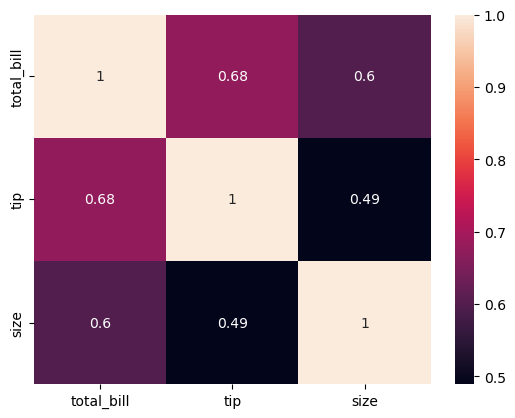

In [35]:
# we now need to simply call heatmap on our correlated data
sns.heatmap(tc, annot=True) # annot = True rights the data in each cell

Lets look at the flight data, we need to create a pivot table first

In [36]:
pvf = flights.pivot_table(values='passengers', index='month', columns='year')
pvf

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot: xlabel='year', ylabel='month'>

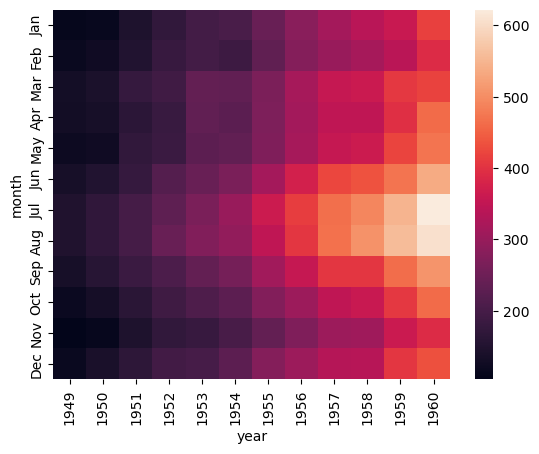

In [37]:
sns.heatmap(pvf)

From looking at the scale, it seems that the overall number of passengers increased from 1949 to 1960
We can observe the popular months for travel are usually June, July and August

**4.2) clustermap()**

clustermaps use hierarchical clustering to produce a clustered version of the heatmap where similar groups are closer together.

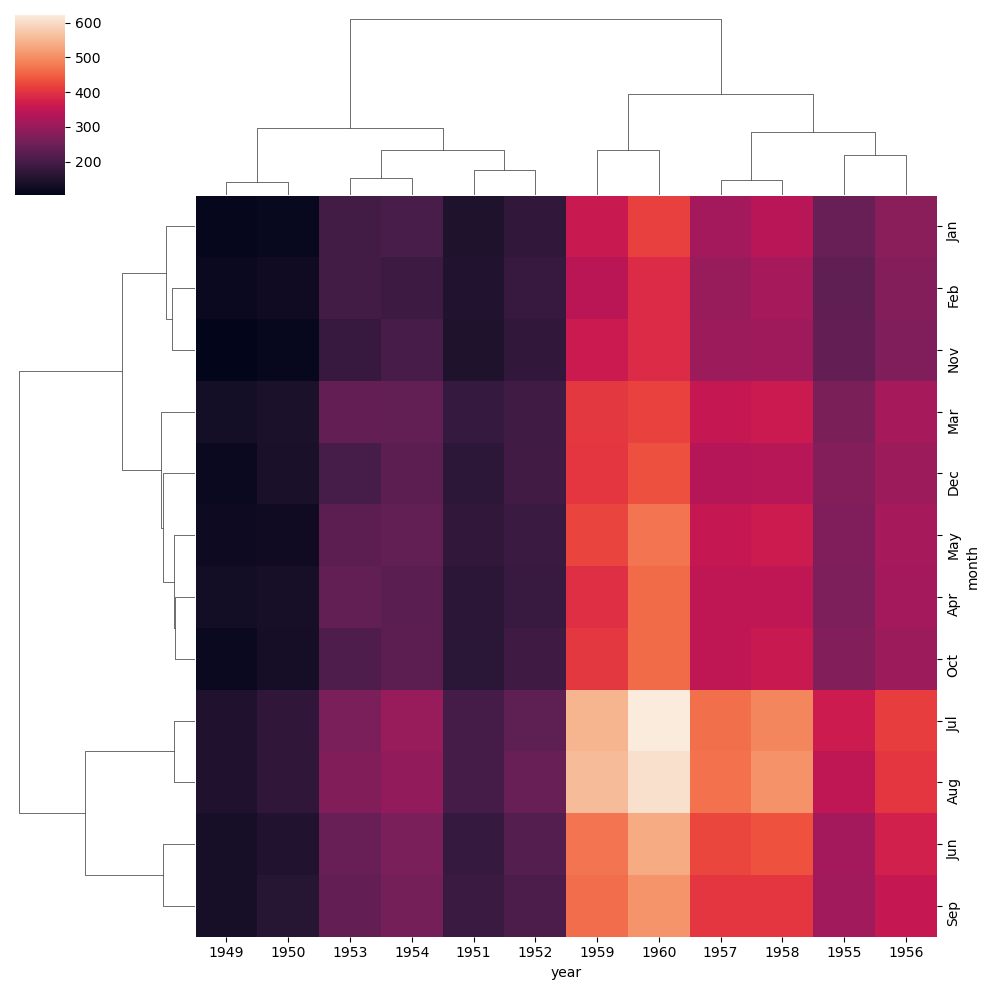

In [38]:
g = sns.clustermap(pvf)

Noticed how the years and months are no longer in order, instead they are grouped by similarty in value (passenger count). That means we can begin to infer things from the plot based on things next to each other.

We can also standardize the scale using `standard_scale=1`

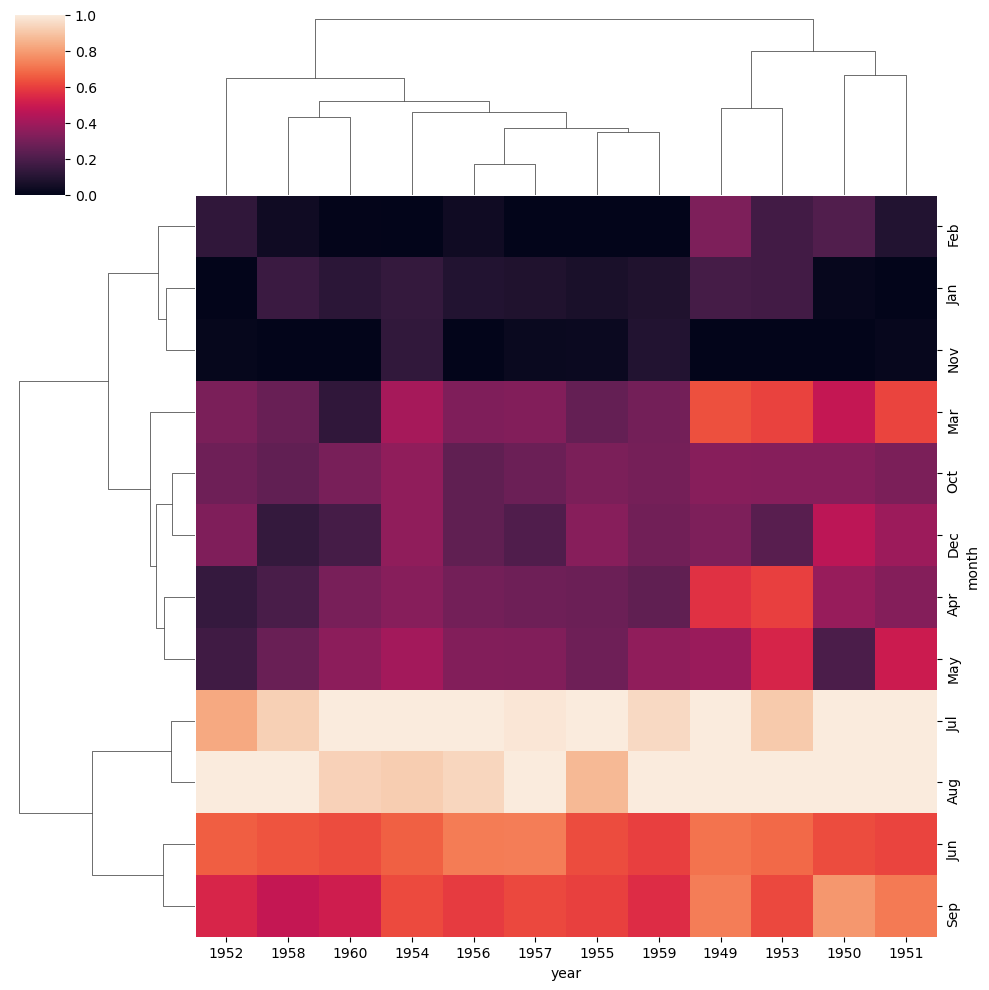

In [39]:
sns.clustermap(pvf, standard_scale=1)

**5) Regression Plots**

In Seaborn, the regression plots are mainly used to provide a visual guide that helps to emphasize patterns during exploratory data analysis. In this section, we will cover the lmplot() method. Later on in the machine learning section, we will cover regression plots in more detail.

In [40]:
tips = sns.load_dataset('tips')

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**5.1) lmplot()**
lmplot() allows us to display linear models with seaborn.
The methods, plots data, and regression model fits across a FacetsGrid. This function combined regplot() and FacetGrid.



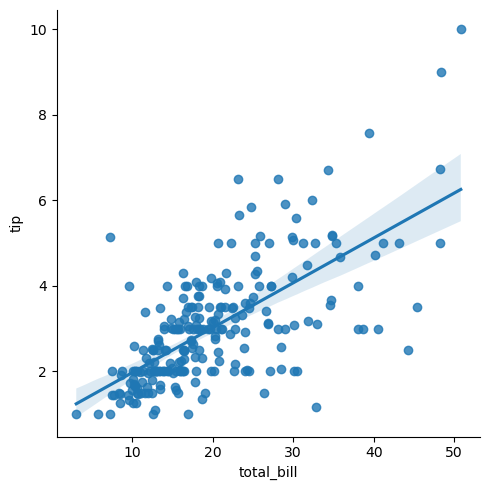

In [42]:
sns.lmplot(x='total_bill', y='tip', data=tips)

In the plot above, we basically have a scatter plot with a linear fit on top of it.
Lets pass a nested categorical argument

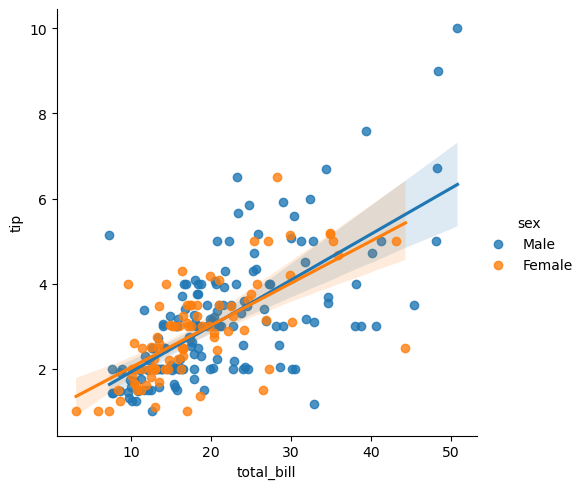

In [43]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

We observe that as far as total_bill vs tip are concerned, male and females have similar linear fit on the data!

**Using Grid**
We can add more separation through columns and rows with the use of a grid. Just indicate using the `col` or `row` argument

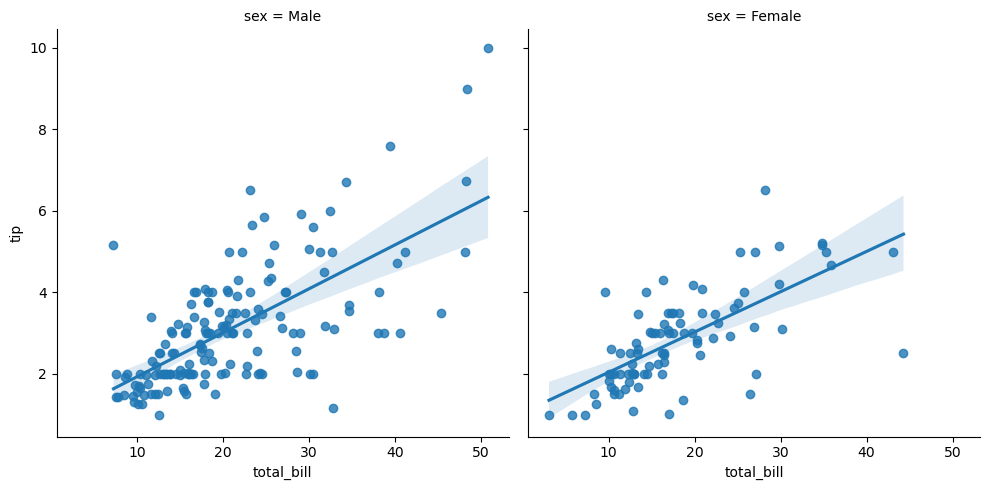

In [44]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

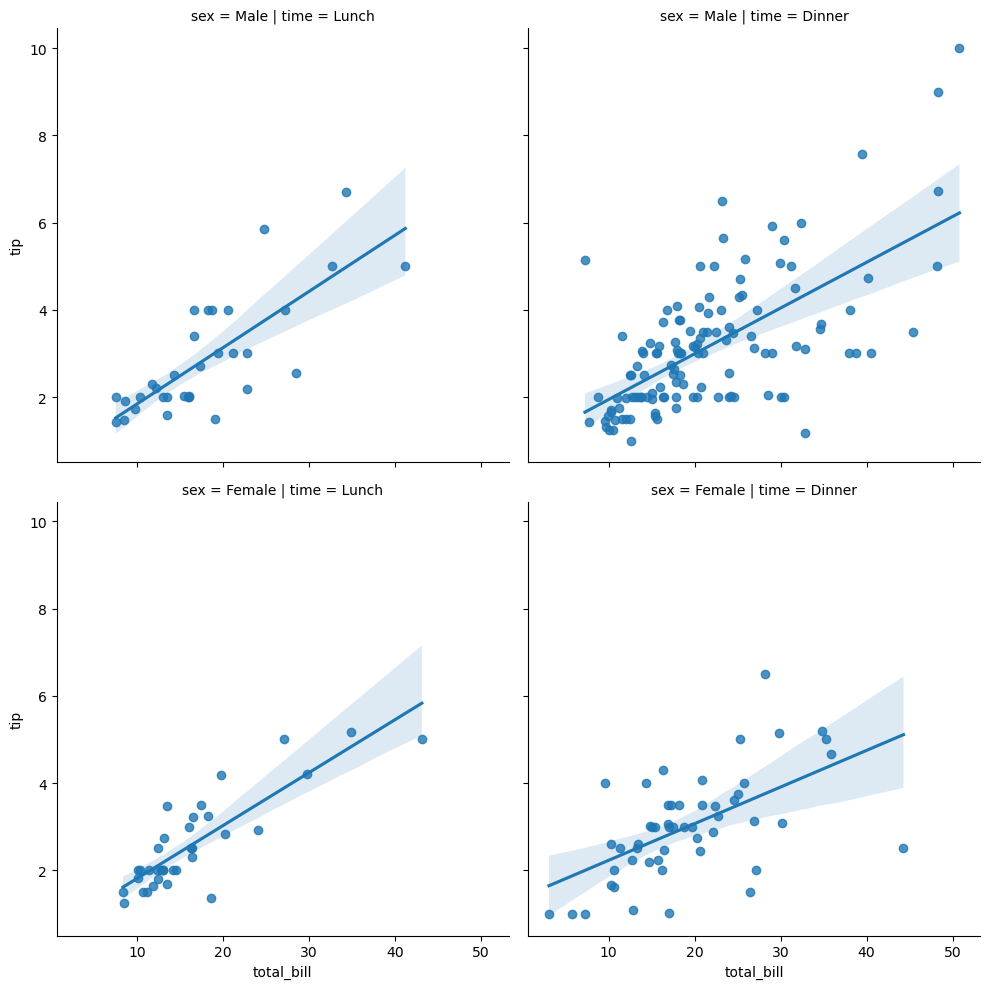

In [45]:
sns.lmplot(x='total_bill', y='tip', data=tips, row='sex', col='time')

We can use the same approaches as previously mentioned
1) using jitter when clarifying overlapping data
2) collapsing the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval

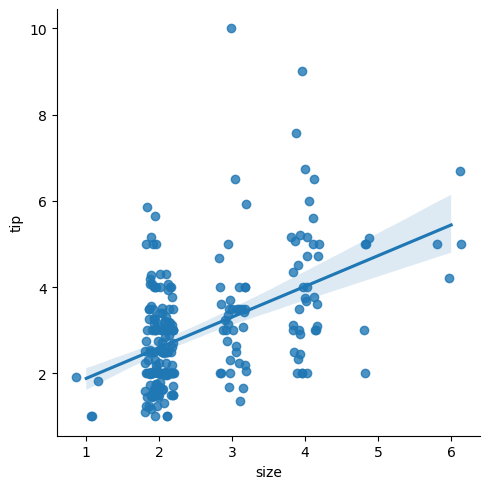

In [46]:
sns.lmplot(x='size', y='tip', data=tips, x_jitter=0.2)

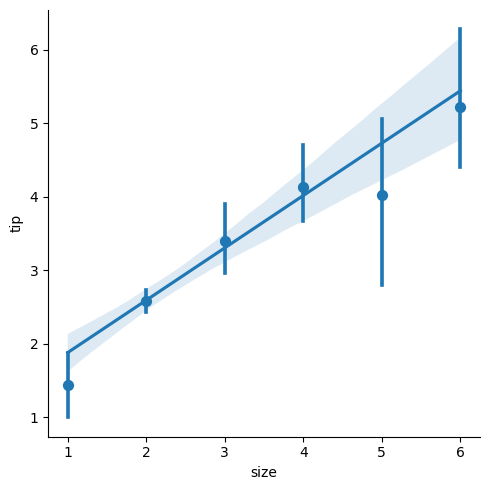

In [47]:
import numpy as np
sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean)

Lets learn another way of getting insight on our data.

What if our y-variable is binary, and we want to separate them with some boundary? As we'll see below, a simple linear regression also works but does not provide convincing predictions. 

First lets create a new column by dividing tips into two columns, True/False based on some condition

In [48]:
tips['big_tip'] = (tips.tip / tips.total_bill) > 0.15

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


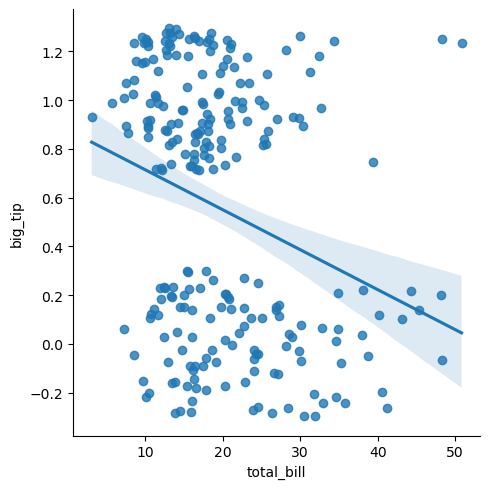

In [50]:
sns.lmplot(x='total_bill', y='big_tip', data=tips, y_jitter=0.3)

Notice that the linear regression line is dividing the two classes, however this is not an appropriate way. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of `y = 1` for a given value of x. We can do this using the `logistic=True` parameter of lmplot

In [53]:
# need to install statsmodel library for below
# sns.lmplot(x='total_bill', y='big_tip', data=tips, logistic=True, y_jitter=0.3)